In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

# Patient 8 THY

## 3M Littmann Data

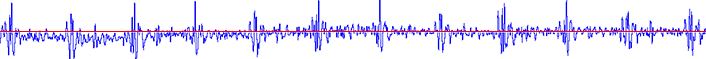

In [41]:
image = Image.open('3M_wzc_s.bmp')
image

In [42]:
x = image.size[0]
y = image.size[1]

In [43]:
print(x)
print(y)

706
59


In [44]:
matrix = []
points = []
integrated_density = 0

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(image.getpixel((i,j)))
        #integrated_density += image.getpixel((i,j))[1]
        #points.append(image.getpixel((i,j))[1])

### Extract Red Line Position

In [45]:
redMax = 0
xStore = 0
yStore = 0
for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        if currentPoint[0] == 255 and currentPoint[1] < 10 and currentPoint[2] < 10:
            redMax = currentPoint[0]
            xStore = xAxis
            yStore = yAxis
            
print(xStore, yStore)

705 31


### Extract Blue Points

In [46]:
redline_pos = 31
gain = 80
absMax = 0
littmannArr = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[2] == 255 and currentPoint[0] < 220 and currentPoint[1] < 220:
            points_vertical.append(yAxis)
            
    #print(points_vertical)
    
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if abs(item-redline_pos) > absMax:
            absMax = abs(item-redline_pos)
            theOne = item 
    littmannArr.append((theOne-redline_pos)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

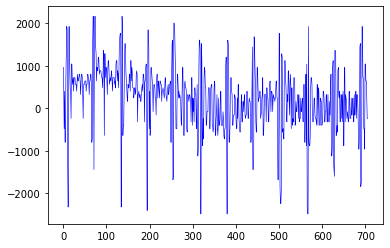

In [47]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

# Ascul Pi Data

In [48]:
pathBase = 'C://Users//triti//OneDrive//Dowrun//Text//Manuscripts//Data//WangZhencai//AusculPi//'
filename = 'Numpy_Array_File_2020-06-19_10_37_30.npy'
line = pathBase + filename
arr = np.load(line)
arr

array([[   149,    141,    121, ...,    527,    534,    550],
       [   554,    585,    565, ...,    106,     99,     96],
       [   124,    114,    136, ...,    218,    215,    221],
       ...,
       [  3692,   3681,   3618, ..., -14527, -14571, -14658],
       [     0,  15645,  15757, ...,   7233,   7302,   7358],
       [  7435,   7518,   7625, ...,    426,    351,    235]], dtype=int16)

In [49]:
arr.shape

(2583, 512)

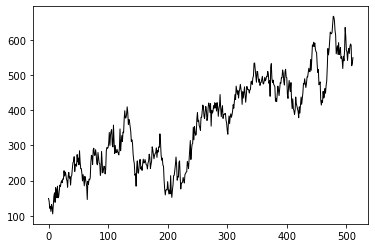

In [50]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[0], linewidth=1.0, color='black')

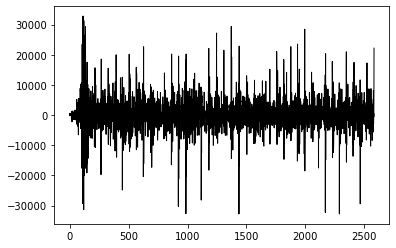

In [51]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[:,200], linewidth=1.0, color='black')

In [52]:
start = 1650
end = 2470

start_adj = int(start * 2583 / 3000)
end_adj = int(end * 2583 / 3000)

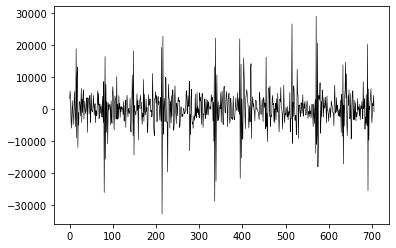

In [53]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[start_adj:end_adj,440], linewidth=0.6, color='black')

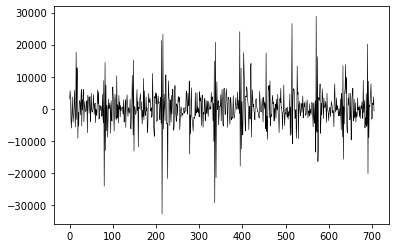

In [54]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[start_adj:end_adj,460], linewidth=0.6, color='black')

In [55]:
start_adj-end_adj

-706

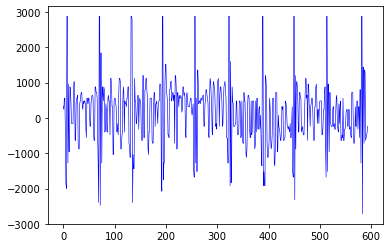

In [16]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

In [56]:
asculArr = arr[start_adj:end_adj,440]

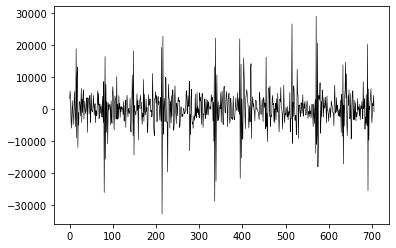

In [57]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr, linewidth=0.6, color='black')

## Preprocess the two array

In [58]:
asculArr_processed = []
littmannArr_processed = []

for ascul in asculArr:
    asculArr_processed.append(math.fabs(ascul))
    
for item in littmannArr:
    littmannArr_processed.append(math.fabs(item))

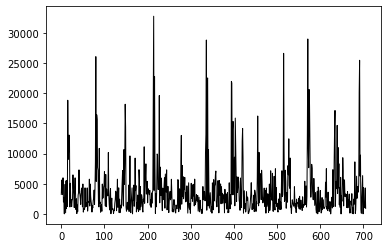

In [59]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed, linewidth=1.0, color='black')

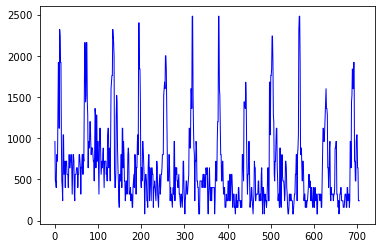

In [60]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed, linewidth=1.0, color='blue')

In [61]:
len(littmannArr)

706

In [62]:
len(asculArr)

706

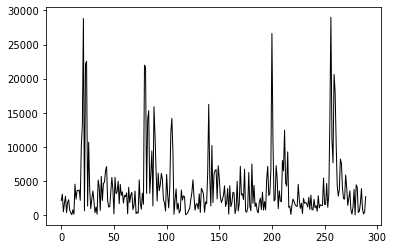

In [105]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed[315:605], linewidth=1.0, color='black')

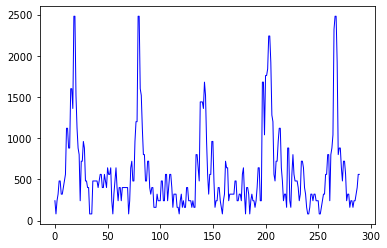

In [106]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed[300:590], linewidth=1.0, color='blue')

### Coeffient

In [75]:
stats.pearsonr(asculArr_processed, littmannArr_processed)

(-0.03719107180736741, 0.32374967434597796)

In [104]:
stats.pearsonr(asculArr_processed[315:605], littmannArr_processed[300:590])

(0.34490615097610283, 1.596080496455966e-09)

### Fitness

In [28]:
stats.chisquare(asculArr_processed[:80], littmannArr_processed[2:82])

Power_divergenceResult(statistic=5454412.698137269, pvalue=0.0)

In [29]:
def cosCalculate(a, b):
    l = len(a)
    
    sumXY = 0
    sumRootXSquare = 0
    sumRootYSquare = 0
    
    for i in range(l):
        sumXY = sumXY + a[i]*b[i]
        sumRootXSquare = sumRootXSquare + math.sqrt(a[i]**2)
        sumRootYSquare = sumRootYSquare + math.sqrt(b[i]**2)
        
    cosValue = sumXY / (sumRootXSquare * sumRootYSquare)
    
    return cosValue    

In [30]:
cosCalculate(asculArr_processed, littmannArr_processed)

0.0017365439703454506